In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

In [2]:
# Carga de los datos
image_path = os.path.abspath(os.path.join('..', 'Dataset'))
data_path = os.path.join(image_path, 'classes.csv')

data = pd.read_csv(data_path)

In [4]:
data_w = pd.read_csv(os.path.join(image_path, 'wclasses.csv'))

In [5]:
data_w.sample(10)

,file,artist,genre,style
79987,Contemporary_Realism/dimitris-mytaras_dog.jpg,0,139,146
71040,Expressionism/paul-klee_boats-in-the-flood-193...,0,139,149
45017,Romanticism/dante-gabriel-rossetti_the-blue-cl...,88,131,163
54941,Expressionism/edvard-munch_meeting-1921.jpg,36,131,149
64478,Expressionism/amedeo-modigliani_the-black-dres...,104,135,149
71939,Ukiyo_e/katsushika-hokusai_vengeful-ghost-that...,0,139,166
37606,Art_Nouveau_Modern/carl-larsson_under-the-birc...,0,131,143
21994,Expressionism/rafael-zabaleta_seated-boy.jpg,0,137,149
65404,Expressionism/lucian-freud_frank-auerbach-1976...,86,135,149
19358,Impressionism/gustave-caillebotte_calf-in-a-bu...,85,138,152


In [3]:
# Muestreo inicial de los datos
data.sample(10)

,filename,artist,genre,description,phash,width,height,genre_count,subset
14463,Expressionism/edvard-munch_nude-1896.jpg,edvard munch,['Expressionism'],nude-1896,887b37257ed24394,1382,1657,1,train
76443,Realism/theodore-gericault_the-wounded-cuirass...,theodore gericault,['Realism'],the-wounded-cuirassier,af37384cb627c838,1382,1675,1,test
32536,Minimalism/richard-tuttle_20-pearls-6-2003.jpg,richard tuttle,"['Minimalism', 'Abstract Expressionism']",20-pearls-6-2003,eb669c9992626b4c,1452,1382,2,train
55125,Romanticism/francisco-goya_the-morisco-gazul-i...,francisco goya,['Romanticism'],the-morisco-gazul-is-the-first-to-fight-bulls-...,b8c3926c6933e33c,2104,1382,1,train
59482,Symbolism/felicien-rops_sex-position-69.jpg,felicien rops,['Symbolism'],sex-position-69,be4a24b16617d82f,1382,2051,1,train
28924,Impressionism/pierre-auguste-renoir_rapha-mait...,pierre auguste renoir,['Impressionism'],rapha-maitre,b94a45f1b0b79a8c,1382,1578,1,train
44563,Realism/camille-corot_la-rochelle-harbor-entra...,camille corot,['Realism'],la-rochelle-harbor-entrance-1851,cdecb21215ad6a74,2160,1382,1,train
4121,Art_Nouveau_Modern/konstantin-korovin_terem-da...,konstantin korovin,['Art Nouveau Modern'],terem-dadon-1909,82c5af46b8bbad88,2156,1382,1,train
31046,Mannerism_Late_Renaissance/hans-von-aachen_bac...,hans von aachen,['Mannerism Late Renaissance'],bacchus-ceres-and-amor-1600,94ca6af5259b3649,1382,2002,1,train
48614,Realism/m.c.-escher_railway-bridge-oosterbeek.jpg,m.c. escher,['Realism'],railway-bridge-oosterbeek,e28d9572ec48b3c6,2006,1382,1,train


El dataset que contiene los datos consta de las siguientes columnas:
- La ruta a la imagen correspondiente
- El artista
- El género pictórico
- El título de la obra
- Un hash único para cada obra
- Las dimensiones (anchura y altura de la imagen)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80042 entries, 0 to 80041
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     80042 non-null  object
 1   artist       80042 non-null  object
 2   genre        80042 non-null  object
 3   description  80042 non-null  object
 4   phash        80042 non-null  object
 5   width        80042 non-null  int64 
 6   height       80042 non-null  int64 
 7   genre_count  80042 non-null  int64 
 8   subset       80042 non-null  object
dtypes: int64(3), object(6)
memory usage: 5.5+ MB


In [5]:
data.describe(include='all')

,filename,artist,genre,description,phash,width,height,genre_count,subset
count,80042,80042,80042,80042,80042,80042.000000,80042.000000,80042.000000,80042
unique,80042,1119,114,75212,80020,NaN,NaN,NaN,3
top,Abstract_Expressionism/aaron-siskind_acolman-1...,vincent van gogh,['Impressionism'],self-portrait,fef3438ca0d605e1,NaN,NaN,NaN,train
freq,1,1888,12847,148,2,NaN,NaN,NaN,63998
mean,NaN,NaN,NaN,NaN,NaN,1645.771058,1659.764848,1.017516,NaN
std,NaN,NaN,NaN,NaN,NaN,400.528095,401.144797,0.131374,NaN
min,NaN,NaN,NaN,NaN,NaN,1381.000000,1381.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1382.000000,1382.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1382.000000,1492.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1842.000000,1842.000000,1.000000,NaN


Se pueden ovservar 80042 muestras. El género de cada cuadro está en un formato algo engorroso, por lo que se eliminarán los corchetes y el exceso de comillas.

In [6]:
# Obtención de las listas de artistas y géneros
artists = np.unique(data['artist'])
data['clean_genre'] = data['genre'].apply(lambda x: x.split(',')[0].replace('[','').replace(']', '').replace('\'', '').replace(' ','_'))
genres = np.unique(data['clean_genre'])

In [7]:
# Número de imágenes correspondientes a cada autor
artist_value_counts = data.groupby('artist')['artist'].value_counts()
print(artist_value_counts)
print(f'\nAutor con menos muestras: {artists[np.argmin(artist_value_counts)]}, con {np.min(artist_value_counts)} muestras')
print(f'Autor con más muestras: {artists[np.argmax(artist_value_counts)]}, con {np.max(artist_value_counts)} muestras')

print('\n\n')

# Número de imágenes correspondientes a cada género
genre_value_counts = data.groupby('clean_genre')['clean_genre'].value_counts()
display(genre_value_counts)
print(f'\nGénero con menos muestras: {genres[np.argmin(genre_value_counts)]}, con {np.min(genre_value_counts)} muestras')
print(f'Género con más muestras: {genres[np.argmax(genre_value_counts)]}, con {np.max(genre_value_counts)} muestras')

artist
a.y. jackson              30
aaron siskind             23
abdullah suriosubroto     18
abidin dino               13
abraham manievich         42
                        ... 
yiannis tsaroychis        85
yov kondzelevych          15
yves gaucher              26
yves klein                29
zinaida serebriakova     361
Name: count, Length: 1119, dtype: int64

Autor con menos muestras: antoni tapies, con 1 muestras
Autor con más muestras: vincent van gogh, con 1888 muestras





clean_genre
Abstract_Expressionism         2594
Action_painting                  93
Analytical_Cubism               110
Art_Nouveau_Modern             4168
Baroque                        4236
Color_Field_Painting           1567
Contemporary_Realism            481
Cubism                         2177
Early_Renaissance              1389
Expressionism                  6335
Fauvism                         923
High_Renaissance               1341
Impressionism                 13028
Mannerism_Late_Renaissance     1277
Minimalism                     1328
Naive_Art_Primitivism          2385
New_Realism                     313
Northern_Renaissance           2551
Pointillism                     501
Pop_Art                        1483
Post_Impressionism             6307
Realism                       10546
Rococo                         2087
Romanticism                    6919
Symbolism                      4524
Synthetic_Cubism                216
Ukiyo_e                        1163
Name: count, dty


Género con menos muestras: Action_painting, con 93 muestras
Género con más muestras: Impressionism, con 13028 muestras


In [8]:
for genre in genres:
    print(f'{genre}, Número de muestras: {genre_value_counts.loc[genre]}, Porcentaje con respecto al total: {round(genre_value_counts.loc[genre]/len(data)*100, 2)}%\n')

Abstract_Expressionism, Número de muestras: 2594, Porcentaje con respecto al total: 3.24%

Action_painting, Número de muestras: 93, Porcentaje con respecto al total: 0.12%

Analytical_Cubism, Número de muestras: 110, Porcentaje con respecto al total: 0.14%

Art_Nouveau_Modern, Número de muestras: 4168, Porcentaje con respecto al total: 5.21%

Baroque, Número de muestras: 4236, Porcentaje con respecto al total: 5.29%

Color_Field_Painting, Número de muestras: 1567, Porcentaje con respecto al total: 1.96%

Contemporary_Realism, Número de muestras: 481, Porcentaje con respecto al total: 0.6%

Cubism, Número de muestras: 2177, Porcentaje con respecto al total: 2.72%

Early_Renaissance, Número de muestras: 1389, Porcentaje con respecto al total: 1.74%

Expressionism, Número de muestras: 6335, Porcentaje con respecto al total: 7.91%

Fauvism, Número de muestras: 923, Porcentaje con respecto al total: 1.15%

High_Renaissance, Número de muestras: 1341, Porcentaje con respecto al total: 1.68%



In [9]:
for artist in artists:
    print(f'{artist}, Número de muestras: {artist_value_counts.loc[artist]}, Porcentaje con respecto al total: {round(artist_value_counts.loc[artist]/len(data)*100, 3)}%\n')

a.y. jackson, Número de muestras: 30, Porcentaje con respecto al total: 0.037%

aaron siskind, Número de muestras: 23, Porcentaje con respecto al total: 0.029%

abdullah suriosubroto, Número de muestras: 18, Porcentaje con respecto al total: 0.022%

abidin dino, Número de muestras: 13, Porcentaje con respecto al total: 0.016%

abraham manievich, Número de muestras: 42, Porcentaje con respecto al total: 0.052%

ad reinhardt, Número de muestras: 29, Porcentaje con respecto al total: 0.036%

adam baltatu, Número de muestras: 64, Porcentaje con respecto al total: 0.08%

adnan coker, Número de muestras: 3, Porcentaje con respecto al total: 0.004%

adolf fleischmann, Número de muestras: 3, Porcentaje con respecto al total: 0.004%

adolf hitler, Número de muestras: 48, Porcentaje con respecto al total: 0.06%

adolphe joseph thomas monticelli, Número de muestras: 39, Porcentaje con respecto al total: 0.049%

adriaen brouwer, Número de muestras: 43, Porcentaje con respecto al total: 0.054%

adr

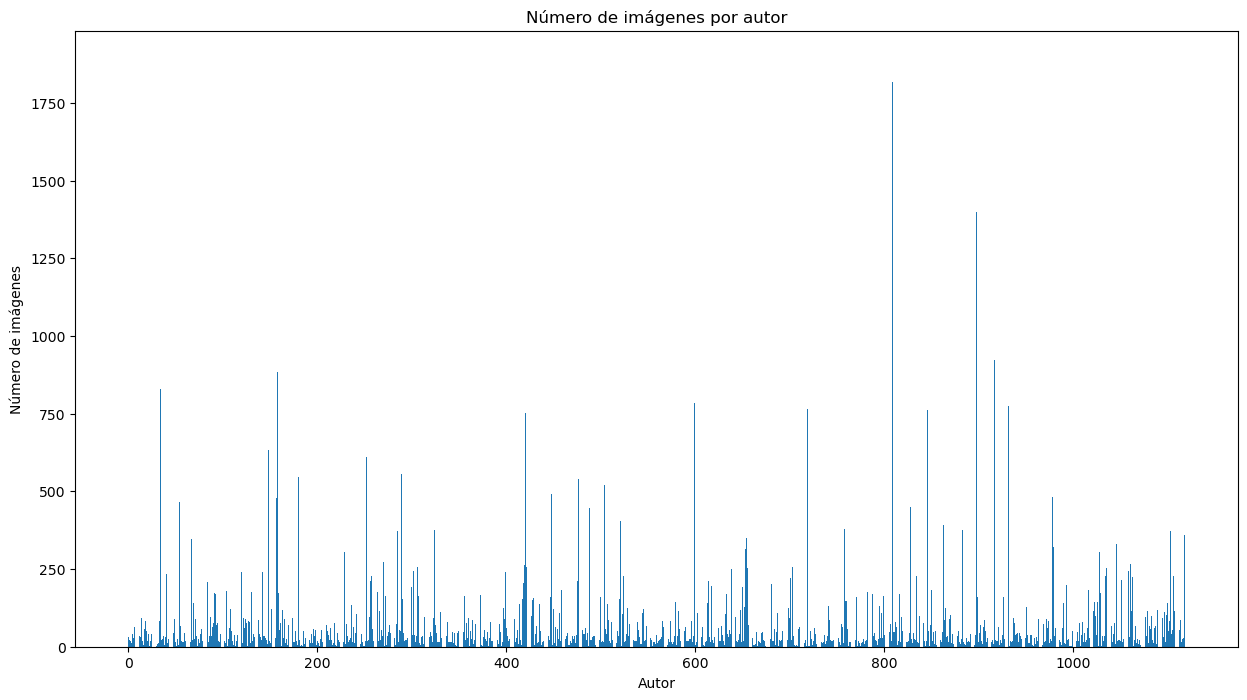

In [10]:
# Visualizamos la cantidad de imágenes de cada etiqueta
plt.figure(figsize=(15, 8))
plt.bar(np.arange(len(artist_value_counts)), artist_value_counts)
plt.title('Número de imágenes por autor')
plt.xlabel('Autor')
plt.ylabel('Número de imágenes')
path = os.path.join('.', 'Samples_by_author.png')
plt.savefig(path)
plt.show()

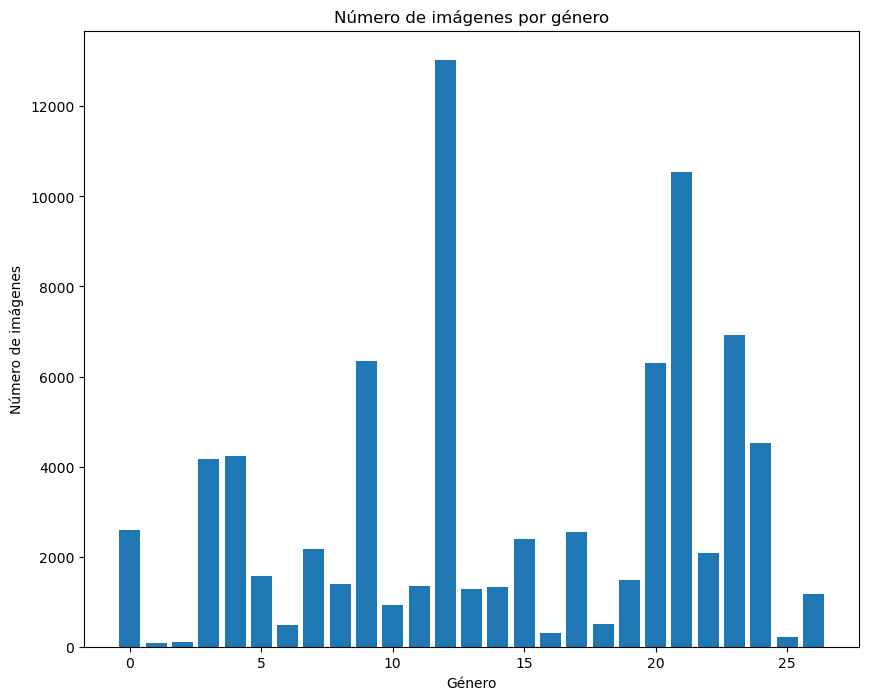

In [11]:
# Visualizamos la cantidad de imágenes de cada etiqueta
plt.figure(figsize=(10, 8))
plt.bar(np.arange(len(genre_value_counts)), genre_value_counts)
plt.title('Número de imágenes por género')
plt.xlabel('Género')
plt.ylabel('Número de imágenes')
path = os.path.join('.', 'Samples_by_genre.png')
plt.savefig(path)
plt.show()

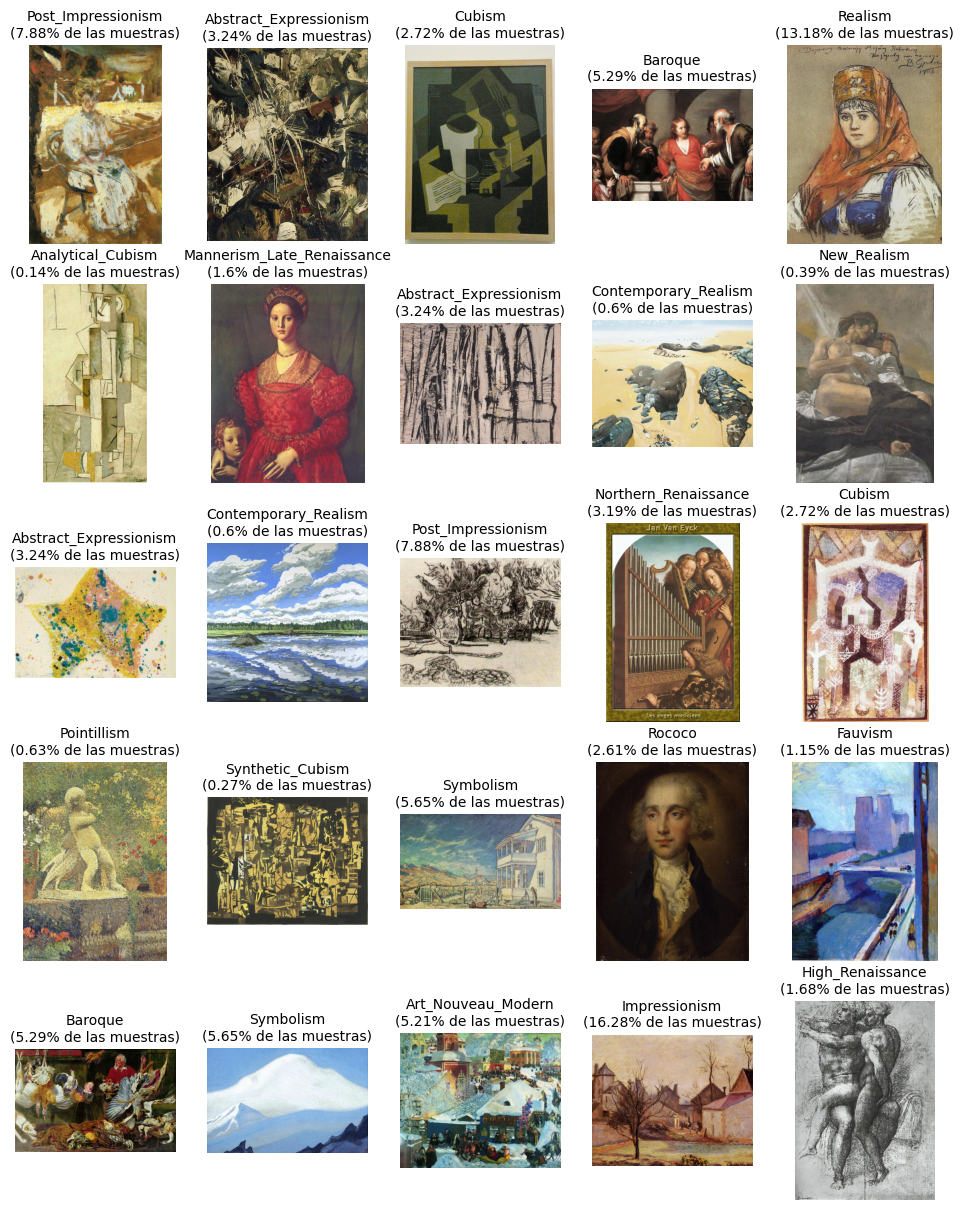

In [12]:
random.seed(42)
num_imagenes = 5
fig, ax = plt.subplots(num_imagenes, num_imagenes, figsize=(12, 15))
for i in range(num_imagenes):
    for j in range(num_imagenes):
        # Elegimos un género aleatorio
        genres_dirs = [name for name in os.listdir(image_path) if os.path.isdir(os.path.join(image_path, name))]
        random_genre = random.choice(genres_dirs)
        # Elegimos una imagen aleatoria dentro del género
        genre_path = os.path.join(image_path, random_genre)
        random_image = random.choice(os.listdir(genre_path))
        # Load and display the image
        image_p = os.path.join(genre_path, random_image)
        image = Image.open(image_p)
        ax[i, j].imshow(image)
        ax[i, j].set_title(f'{random_genre}\n({round(genre_value_counts.loc[random_genre]/len(data)*100, 2)}% de las muestras)', fontsize=10)
        ax[i, j].axis('off')
path = os.path.join('.', 'Samples.png')
plt.savefig(path)
plt.show()